#pose cheker

##test google library for landmarks

In [1]:
# !pip uninstall mediapipe
# !pip install mediapipe --upgrade
%pip install mediapipe==0.10.5

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mediapipe as mp
print(mp.__version__)

0.10.5


In [3]:
import mediapipe as mp
print('detected landmarks')
# Iterate through all PoseLandmark values and print their names
for landmark in mp.solutions.pose.PoseLandmark:
    print(f"{landmark.value}: {landmark.name}",end = ' , ')
    if landmark.value % 4 == 3:
      print()


detected landmarks
0: NOSE , 1: LEFT_EYE_INNER , 2: LEFT_EYE , 3: LEFT_EYE_OUTER , 
4: RIGHT_EYE_INNER , 5: RIGHT_EYE , 6: RIGHT_EYE_OUTER , 7: LEFT_EAR , 
8: RIGHT_EAR , 9: MOUTH_LEFT , 10: MOUTH_RIGHT , 11: LEFT_SHOULDER , 
12: RIGHT_SHOULDER , 13: LEFT_ELBOW , 14: RIGHT_ELBOW , 15: LEFT_WRIST , 
16: RIGHT_WRIST , 17: LEFT_PINKY , 18: RIGHT_PINKY , 19: LEFT_INDEX , 
20: RIGHT_INDEX , 21: LEFT_THUMB , 22: RIGHT_THUMB , 23: LEFT_HIP , 
24: RIGHT_HIP , 25: LEFT_KNEE , 26: RIGHT_KNEE , 27: LEFT_ANKLE , 
28: RIGHT_ANKLE , 29: LEFT_HEEL , 30: RIGHT_HEEL , 31: LEFT_FOOT_INDEX , 
32: RIGHT_FOOT_INDEX , 

##get angles

In [4]:
import cv2
import numpy as np
import mediapipe as mp
# from google.colab.patches import cv2_imshow  # Import cv2_imshow
import math

def calculate_angle(point1, point2, point3):
    """
    Calculates the angle at point2 formed by the lines connecting it to point1 and point3.

    Args:
        point1 (tuple): Coordinates (x, y) of the first point.
        point2 (tuple): Coordinates (x, y) of the vertex (the point where the angle is).
        point3 (tuple): Coordinates (x, y) of the third point.

    Returns:
        float: The angle in degrees.
    """
    x1, y1 = point1
    x2, y2 = point2
    x3, y3 = point3

    # Calculate vectors
    vector1 = (x1 - x2, y1 - y2)
    vector2 = (x3 - x2, y3 - y2)

    # Calculate dot product
    dot_product = vector1[0] * vector2[0] + vector1[1] * vector2[1]

    # Calculate magnitudes (lengths) of the vectors
    magnitude1 = math.sqrt(vector1[0]**2 + vector1[1]**2)
    magnitude2 = math.sqrt(vector2[0]**2 + vector2[1]**2)

    # Calculate cosine of the angle
    if magnitude1 == 0 or magnitude2 == 0:
        return 0.0  # Handle cases where points are the same
    cos_theta = dot_product / (magnitude1 * magnitude2)

    # Ensure cos_theta is within the valid range [-1, 1] due to potential floating-point errors
    cos_theta = max(-1.0, min(1.0, cos_theta))

    # Calculate the angle in radians and convert to degrees
    angle_radians = math.acos(cos_theta)
    angle_degrees = math.degrees(angle_radians)

    return angle_degrees



In [26]:
# Function to extract the coordinates of a landmark
def get_landmark_coordinates(landmarks, landmark_id):
    try:
        x = landmarks.landmark[landmark_id].x
        y = landmarks.landmark[landmark_id].y
        x=x/1
        y=y/1
        return np.array([x, y])
    except:
        return np.array([0, 0])  # Return [0, 0] if landmark is not detected

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

def calculate_angles_landmarks(landmarks):
        # Left side angles
        left_shoulder = get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.LEFT_SHOULDER)
        left_elbow = get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.LEFT_ELBOW)
        left_wrist = get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.LEFT_WRIST)
        #
        right_shoulder = get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.RIGHT_SHOULDER)
        right_elbow = get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.RIGHT_ELBOW)
        right_wrist = get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.RIGHT_WRIST)
        #
        left_hip = get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.LEFT_HIP)
        left_knee = get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.LEFT_KNEE)
        #
        right_hip = get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.RIGHT_HIP)
        right_knee = get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.RIGHT_KNEE)
        #
        left_ankle = get_landmark_coordinates(landmarks,mp_pose.PoseLandmark.LEFT_ANKLE)
        right_ankle = get_landmark_coordinates(landmarks,mp_pose.PoseLandmark.RIGHT_ANKLE)
        #

        if np.any(left_shoulder) and np.any(left_elbow) and np.any(left_wrist):
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
        else: left_elbow_angle = 0

        if np.any(left_shoulder) and np.any(left_hip) and np.any(left_knee):
            left_hip_angle = calculate_angle(left_shoulder, left_hip, left_knee)
        else:  left_hip_angle = 0

        if np.any(right_shoulder) and np.any(right_elbow) and np.any(right_wrist):
            right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
        else:   right_elbow_angle = 0

        if np.any(right_shoulder) and np.any(right_hip) and np.any(right_knee):
            right_hip_angle = calculate_angle(right_shoulder, right_hip, right_knee)
        else:  right_hip_angle = 0

        if np.any(right_knee) and np.any(right_ankle) and np.any(right_hip):
            right_knee_angle = calculate_angle(right_ankle , right_knee, right_hip)
        else:   right_knee_angle = 0

        if np.any(left_knee) and np.any(left_ankle) and np.any(left_hip):
            left_knee_angle = calculate_angle(left_ankle , left_knee , left_hip)
        else:  left_knee_angle = 0


        # Additional angles (e.g., shoulders, knees, etc.)
        head0 = 0
        num = 0
        head = get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.NOSE)
        if not np.array_equal(head, head0): num += 1
        head0 = head

        head += get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.RIGHT_EYE)
        if (head[0]==head0[0]) & (head[1]==head0[1]): num += 1
        head0 = head

        head += get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.LEFT_EYE)
        if (head[0]==head0[0]) & (head[1]==head0[1]): num += 1
        head0 = head

        head += get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.RIGHT_EAR)
        if (head[0]==head0[0]) & (head[1]==head0[1]): num += 1
        head0 = head

        head += get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.LEFT_EAR)
        if (head[0]==head0[0]) & (head[1]==head0[1]): num += 1
        head0 = head

        head /= num

        if np.any(head) and np.any(left_shoulder) and np.any(left_elbow):
            left_arm_angle = calculate_angle(head, left_shoulder, left_elbow)
        else:
            left_arm_angle = 0

        if np.any(head) and np.any(right_shoulder) and np.any(right_elbow):
            right_arm_angle = calculate_angle(head, right_shoulder, right_elbow)
        else:
            right_arm_angle = 0

        if np.any(head) and np.any(left_shoulder) and np.any(left_hip):
            left_back_angle = calculate_angle(head, left_shoulder, left_hip)
        else:
            left_back_angle = 0

        if np.any(head) and np.any(right_shoulder) and np.any(right_hip):
            right_back_angle = calculate_angle(head, right_shoulder, right_hip)
        else:
            right_back_angle = 0
        ###############
        angles = {
                "left_elbow_angle": left_elbow_angle,
                "left_hip_angle": left_hip_angle,
                "right_elbow_angle": right_elbow_angle,
                "right_hip_angle": right_hip_angle,
                "left_arm_angle": left_arm_angle,
                "right_arm_angle": right_arm_angle,
                "left_back_angle": left_back_angle,
                "right_back_angle": right_back_angle,
                "left_knee_angle": left_knee_angle,
                "right_knee_angle": right_knee_angle
        }

        locations={
            "left_shoulder":left_shoulder,
            "left_elbow":left_elbow,
            "left_wrist":left_wrist,
            "right_shoulder":right_shoulder,
            "right_elbow":right_elbow,
            "right_wrist":right_wrist,

            "head":head,

            "left_hip":left_hip,
            "left_knee":left_knee,
            "left_ankle":left_ankle,

            "right_hip":right_hip,
            "right_knee":right_knee,
            "right_ankle":right_ankle
        }
        return angles,locations



In [27]:
# Function to calculate the angles for both left and right sides and overlay on image
def calculate_and_display_angles(image_path, return_angles=False):
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get pose landmarks
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        # landmarks = results.pose_landmarks
        ########
        ang , locs = calculate_angles_landmarks(results.pose_landmarks)

        #if only angles needed
        if return_angles:
          return ang

        # Draw the pose landmarks on the image
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Display the angle values at corresponding locations
        def overlay_angle(angle, location, color=(0, 255, 0)):
            # Coordinates are normalized, scale them to the image size
            x = int(location[0] * image.shape[1])
            y = int(location[1] * image.shape[0])
            cv2.putText(image, f'{angle:.2f}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 1)

        # Overlay angles on the image
        if np.any(ang['left_elbow_angle']!=0):
            overlay_angle(ang['left_elbow_angle'], locs['left_elbow'], (0, 255, 0))  # Left elbow angle
        if np.any(ang['right_elbow_angle']!=0):
            overlay_angle(ang['right_elbow_angle'], locs['right_elbow'], (0, 255, 0))  # Right elbow angle
        if np.any(ang['left_hip_angle']!=0):
            overlay_angle(ang['left_hip_angle'], locs['left_hip'], (0, 255, 0))  # Left hip angle
        if np.any(ang['right_hip_angle']!=0):
            overlay_angle(ang['right_hip_angle'], locs['right_hip'], (0, 255, 0))  # Right hip angle
        if np.any(ang['left_arm_angle']!=0):
            overlay_angle(ang['left_arm_angle'], (locs['left_shoulder']
                                                   + locs['left_elbow'])/2, (0, 255, 0))  # Left arm angle
        if np.any(ang['right_arm_angle']!=0):
            overlay_angle(ang['right_arm_angle'], (locs['right_shoulder']
                                                   + locs['right_elbow'])/2, (0, 255, 0))
        if np.any(ang['left_back_angle']!=0):
            overlay_angle(ang['left_back_angle'], locs['left_shoulder'], (0, 255, 0))  # Left back angle
        if np.any(ang['right_back_angle']!=0):
            overlay_angle(ang['right_back_angle'], locs['right_shoulder'], (0, 255, 0))  # Right back angle

        if np.any(ang['left_knee_angle']!=0):
            overlay_angle(ang['left_knee_angle'], locs['left_knee'], (0, 255, 0))  # Left knee angle

        if np.any(ang['right_knee_angle']!=0):
            overlay_angle(ang['right_knee_angle'], locs['right_knee'], (0, 255, 0))  # Right knee angle

        # Return the image with the overlayed angles
        return image
    else:
        return None


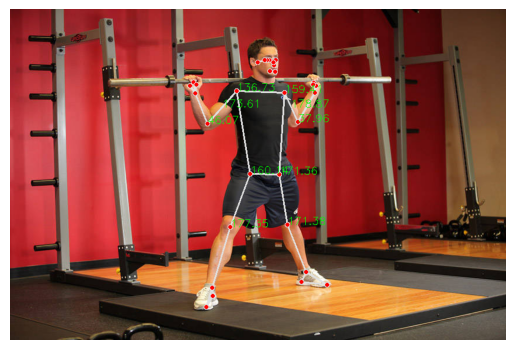

left_elbow_angle: 37.96° , left_hip_angle: 171.36° , 
right_elbow_angle: 46.07° , right_hip_angle: 160.14° , 
left_arm_angle: 178.87° , right_arm_angle: 173.61° , 
left_back_angle: 159.41° , right_back_angle: 136.73° , 
left_knee_angle: 171.38° , right_knee_angle: 177.35° , 


In [28]:
import matplotlib.pyplot as plt
import os
# Example usage
current_directory = os.getcwd()
image_path = os.path.join(current_directory,
'0.jpg')

image_with_angles = calculate_and_display_angles(image_path)

if image_with_angles is not None:
    plt.imshow(cv2.cvtColor(image_with_angles, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis
    plt.show()
    # cv2.imshow("name",image_with_angles) # Changed to cv2_imshow
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
else:
    print("No pose landmarks detected in the image.")


a  = calculate_and_display_angles(image_path,True)
b=0
if a:
  for angle_name, angle_value in a.items():
    print(f"{angle_name}: {angle_value:.2f}°",end = ' , ')
    b+=1
    if b%2==0:
      print('')


###tests

In [8]:
image_path = image_path = os.path.join(
  current_directory, '0.jpg')

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get pose landmarks
results = pose.process(image_rgb)

print('item : (x , y , z)')
print( image.shape)
# if results.pose_landmarks:
landmarks = results.pose_landmarks
for landmark_id in mp_pose.PoseLandmark:
# landmark_id = mp_pose.PoseLandmark.LEFT_SHOULDER
  x = landmarks.landmark[landmark_id].x * image.shape[1]
  y = landmarks.landmark[landmark_id].y * image.shape[0]
  z = landmarks.landmark[landmark_id].z
  print(f'{landmark_id.name} : ({x:.2f} , {y:.2f} , {z:.2f})')

# landmark_id = mp_pose.PoseLandmark.LEFT_ELBOW
# x = landmarks.landmark[landmark_id].x * image.shape[1]
# y = landmarks.landmark[landmark_id].y * image.shape[0]
# z = landmarks.landmark[landmark_id].z
# print(f'{landmark_id.name} : ({x:.2f} , {y:.2f} , {z:.2f})')

# landmark_id = mp_pose.PoseLandmark.RIGHT_EYE
# x = landmarks.landmark[landmark_id].x * image.shape[1]
# y = landmarks.landmark[landmark_id].y * image.shape[0]
# z = landmarks.landmark[landmark_id].z
# print(f'{landmark_id.name} : ({x:.2f} , {y:.2f} , {z:.2f})')

head=0
# head = get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.NOSE)
head += get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.RIGHT_EAR)
# head += get_landmark_coordinates(landmarks, mp_pose.PoseLandmark.LEFT_EAR)
# head /= 3
x = head[0] * image.shape[1]
y = head[1] * image.shape[0]
# z = landmarks.landmark[landmark_id].z
print(f'head : ({x:.2f} , {y:.2f})')


# landmark_id = mp_pose.PoseLandmark.LEFT_WRIST
# x = landmarks.landmark[landmark_id].x * image.shape[1]
# y = landmarks.landmark[landmark_id].y * image.shape[0]
# z = landmarks.landmark[landmark_id].z
# print(f'{landmark_id.name} : ({x:.2f} , {y:.2f} , {z:.2f})')

# landmark_id = mp_pose.PoseLandmark.LEFT_HIP
# x = landmarks.landmark[landmark_id].x * image.shape[1]
# y = landmarks.landmark[landmark_id].y * image.shape[0]
# z = landmarks.landmark[landmark_id].z
# print(f'{landmark_id.name} : ({x:.2f} , {y:.2f} , {z:.2f})')

# landmark_id = mp_pose.PoseLandmark.LEFT_KNEE
# x = landmarks.landmark[landmark_id].x * image.shape[1]
# y = landmarks.landmark[landmark_id].y * image.shape[0]
# z = landmarks.landmark[landmark_id].z
# print(f'{landmark_id.name} : ({x:.2f} , {y:.2f} , {z:.2f})')


item : (x , y , z)
(500, 750, 3)
NOSE : (611.22 , 154.14 , 0.04)
LEFT_EYE_INNER : (621.13 , 156.85 , 0.01)
LEFT_EYE : (622.87 , 159.28 , 0.01)
LEFT_EYE_OUTER : (624.80 , 161.73 , 0.01)
RIGHT_EYE_INNER : (619.62 , 154.15 , 0.05)
RIGHT_EYE : (620.20 , 154.71 , 0.05)
RIGHT_EYE_OUTER : (620.87 , 155.22 , 0.05)
LEFT_EAR : (632.89 , 178.74 , -0.02)
RIGHT_EAR : (625.77 , 166.19 , 0.13)
MOUTH_LEFT : (607.76 , 166.39 , 0.03)
MOUTH_RIGHT : (606.67 , 163.95 , 0.07)
LEFT_SHOULDER : (609.08 , 223.83 , -0.08)
RIGHT_SHOULDER : (593.03 , 178.16 , 0.23)
LEFT_ELBOW : (549.69 , 200.37 , -0.16)
RIGHT_ELBOW : (556.42 , 135.15 , 0.21)
LEFT_WRIST : (603.91 , 164.38 , -0.11)
RIGHT_WRIST : (597.77 , 138.95 , 0.14)
LEFT_PINKY : (615.88 , 161.12 , -0.12)
RIGHT_PINKY : (608.93 , 141.57 , 0.13)
LEFT_INDEX : (618.29 , 165.88 , -0.10)
RIGHT_INDEX : (610.29 , 146.20 , 0.16)
LEFT_THUMB : (613.37 , 167.67 , -0.10)
RIGHT_THUMB : (606.53 , 148.17 , 0.14)
LEFT_HIP : (470.53 , 248.49 , -0.13)
RIGHT_HIP : (476.22 , 221.51 ,

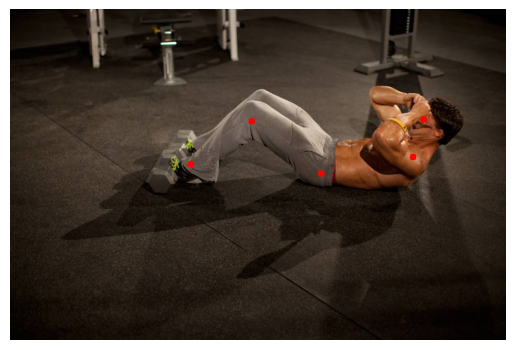

In [9]:
import cv2
import matplotlib.pyplot as plt

# Image dimensions (500x750 pixels)
image_width = 750
image_height = 500

# Original normalized coordinates for the points
points = {
    "LEFT_SHOULDER": (609, 223),
    "LEFT_HIP": (470, 248),
    "LEFT_KNEE": (365, 169),
    # "LEFT_ELBOW": (549, 200),
    # "LEFT_WRIST": (603, 164),
    "head" : (625 , 166),
    "LEFT_HIP": (470, 248),
    "LEFT_KNEE": (365, 169),
    "LEFT_ANKLE" : (273 , 234),
    # "RIGHT_ANKLE" : (294 , 220)
}

# Load your image (make sure to replace the path with your image file)
image_path = image_path = os.path.join(
  current_directory, '0.jpg')
image = cv2.imread(image_path)

# Scale the coordinates to the image dimensions
scaled_points =points
#  {
#     key: (int(x * image_width / 500), int(y * image_height / 750))
#     for key, (x, y) in points.items()
# }

# Draw the points on the image
for a in points:
    cv2.circle(image, points[a], 5, (0, 0, 255), -1)  # Red points
# for point_name, (x, y) in scaled_points.items():
#     cv2.circle(image, (x, y), 5, (0, 0, 255), -1)  # Red points

# Display the image with points
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis
plt.show()


##Flask

In [10]:
%pip install fastapi uvicorn opencv-python mediapipe numpy
%pip install python-multipart

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import uvicorn
# from fastapi import FastAPI, File, UploadFile
# from fastapi.responses import StreamingResponse
# import cv2
# import numpy as np
# import mediapipe as mp
# import io

# app = FastAPI()

# # Route for checking if the server is running
# @app.get("/")
# def read_root():
#     return {"message": "Pose detection API is running!"}

# ###################################

# # mp_pose = mp.solutions.pose
# # pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
# # def calculate_and_display_angles(image_path, return_angles=False):
# #     image = cv2.imread(image_path)
# #     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# #     results = pose.process(image_rgb)

# #     if results.pose_landmarks:
# #         # Compute angles here and return image or angles based on return_angles flag
# #         pass

# #     return image

# ########################

# @app.post("/detect_pose_image")
# async def detect_pose_image(file: UploadFile = File(...)):
#     return {"message": "Image uploaded successfully!"}

#     # image_path = 'uploaded_image.jpg'
#     # with open(image_path, 'wb') as f:
#     #     f.write(await file.read())

#     # result_image = calculate_and_display_angles(image_path, return_angles=False)
#     # _, buffer = cv2.imencode('.jpg', result_image)
#     # return StreamingResponse(io.BytesIO(buffer.tobytes()), media_type="image/jpeg")

# #####################

# @app.post("/detect_pose_angles")
# async def detect_pose_angles(file: UploadFile = File(...)):
#     return {"message": "Image uploaded successfully!"}

#     # image_path = 'uploaded_image.jpg'
#     # with open(image_path, 'wb') as f:
#     #     f.write(await file.read())

#     # angles = calculate_and_display_angles(image_path, return_angles=True)
#     # return angles

# ################

# if __name__ == "__main__":
#     # This ensures the app only runs when it's executed directly, not inside a Jupyter notebook
#     try:
#         import nest_asyncio
#         nest_asyncio.apply()  # Apply patch to allow running the event loop inside an existing one (for Jupyter notebooks)
#     except ImportError:
#         pass

#     print("Starting the API server...")
#     uvicorn.run(app, host="0.0.0.0", port=8000)


INFO:     Started server process [9476]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


Starting the API server...


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [9476]


In [ ]:
%pip install main

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement main (from versions: none)
ERROR: No matching distribution found for main


In [ ]:
# app = FastAPI()

# # Route for checking if the server is running
# @app.get("/")
# def read_root():
#     return {"message": "Pose detection API is running!"}
# @app.post("/detect_pose_image")
# async def detect_pose_image(file: UploadFile = File(...)):
#     return {"message": "Image uploaded successfully!"}
# #
# @app.post("/detect_pose_angles")
# async def detect_pose_angles(file: UploadFile = File(...)):
#     return {"message": "Image uploaded successfully!"}
# #
# if __name__ == "__main__":
#     # This ensures the app only runs when it's executed directly, not inside a Jupyter notebook
#     try:
#         import nest_asyncio
#         nest_asyncio.apply()  # Apply patch to allow running the event loop inside an existing one (for Jupyter notebooks)
#     except ImportError:
#         pass

#     print("Starting the API server...")
#     uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [29200]
INFO:     Waiting for application startup.
INFO:     ASGI 'lifespan' protocol appears unsupported.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8080 (Press CTRL+C to quit)
ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "c:\Users\Ehsan\.conda\envs\myenv\lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "c:\Users\Ehsan\.conda\envs\myenv\lib\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
  File "c:\Users\Ehsan\.conda\envs\myenv\lib\site-packages\uvicorn\middleware\asgi2.py", line 14, in __call__
    instance = self.app(scope)
TypeError: Flask.__call__() missing 1 required positional argument: 'start_response'


INFO:     127.0.0.1:53808 - "GET / HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "c:\Users\Ehsan\.conda\envs\myenv\lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "c:\Users\Ehsan\.conda\envs\myenv\lib\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
  File "c:\Users\Ehsan\.conda\envs\myenv\lib\site-packages\uvicorn\middleware\asgi2.py", line 14, in __call__
    instance = self.app(scope)
TypeError: Flask.__call__() missing 1 required positional argument: 'start_response'


INFO:     127.0.0.1:53809 - "GET /favicon.ico HTTP/1.1" 500 Internal Server Error


INFO:     Shutting down
INFO:     Finished server process [29200]


In [ ]:
%pip install flask-ngrok
#THERE WAS A PROG=BLEM WITH RUNN THE CODE AND APP WITH UNICORN
#SO I MOVED TO NORMAL FLASK APP
# BUT THEN HAVE TO MOVE TO FLASK-NGROK

  Using cached flask_ngrok-0.0.25-py3-none-any.whl.metadata (1.8 kB)
Using cached flask_ngrok-0.0.25-py3-none-any.whl (3.1 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:

from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
import os

##FILES CHECKS
# Set up the upload folder and allowed extensions
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg', 'gif'}
upload_folder = r"C:\Users\Ehsan\Downloads\Documents"
if not os.path.exists(upload_folder):
    os.makedirs(upload_folder)
    
# Helper function to check allowed file extensions
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS
###

app = Flask(__name__)
run_with_ngrok(app)  # This will use ngrok for the server

@app.route('/')
def hello():
    return 'Hello, World!'

@app.route('/1', methods=['POST'])
def upload_file():
    # return 'File uploaded successfully!'
    #
    # Debugging: Print the full request data
    # print("##########\nHeaders:", request.headers)
    # print("##########\nForm data:", request.form)
    # print("################\nFile part in request:", request.files)
    #
    if 'image' not in request.files:
        return {"message": "No file part"}
    
    #########################
    file = request.files['image']
    

    if file.filename == '':
        return {"message": "No selected file"}
    
    filename = os.path.join(upload_folder, file.filename)
    #app.config['UPLOAD_FOLDER'], file.filename)
    file.save(filename)
    

    # return {"message": "File uploaded successfully!", "filename": filename}#file.filename}
    #
    # If the file is allowed and we get a filename
    if file and allowed_file(file.filename):
        # Save the file
        # filename = os.path.join(app.config['UPLOAD_FOLDER'], file.filename)
        filename = os.path.join(upload_folder, file.filename)
        #app.config['UPLOAD_FOLDER'], file.filename)
        file.save(filename)
        return {"message": "File uploaded successfully!", "filename": file.filename}
    else:
        return {"message": "File type not allowed"}
    

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/Apr/2025 23:25:28] "POST /1 HTTP/1.1" 200 -


##########
Headers: User-Agent: PostmanRuntime/7.43.3
Accept: */*
Postman-Token: fd4decb8-c82d-4c80-8733-3defbe1bf7aa
Host: localhost:5000
Accept-Encoding: gzip, deflate, br
Connection: keep-alive
Content-Type: multipart/form-data; boundary=--------------------------921577821813245540213429
Content-Length: 39434


##########
Form data: ImmutableMultiDict([])
################
File part in request: ImmutableMultiDict([('image', <FileStorage: '1.jpg' ('image/jpeg')>)])


Exception in thread Thread-85:
Traceback (most recent call last):
  File "c:\Users\Ehsan\.conda\envs\myenv\lib\site-packages\urllib3\connection.py", line 198, in _new_conn
    sock = connection.create_connection(
  File "c:\Users\Ehsan\.conda\envs\myenv\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "c:\Users\Ehsan\.conda\envs\myenv\lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\Ehsan\.conda\envs\myenv\lib\site-packages\urllib3\connectionpool.py", line 787, in urlopen
    response = self._make_request(
  File "c:\Users\Ehsan\.conda\envs\myenv\lib\site-packages\urllib3\connectionpool.py", line 493, in _make_request
    conn.request(
  File "c:\Users\Eh